# Phishing attack detection using DTC

## Import Libraries and Packages

In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,SelectKBest,mutual_info_classif
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.metrics import classification_report

## Loading Dataset 
Source Dataset(td.arff) is downloaded from UCI Repository.

In [2]:
data,meta = arff.loadarff("td.arff")
#converstion 
df = pd.DataFrame(data.flatten())

## Features

In [3]:

print(meta)

Dataset: phishing
	having_IP_Address's type is nominal, range is ('-1', '1')
	URL_Length's type is nominal, range is ('1', '0', '-1')
	Shortining_Service's type is nominal, range is ('1', '-1')
	having_At_Symbol's type is nominal, range is ('1', '-1')
	double_slash_redirecting's type is nominal, range is ('-1', '1')
	Prefix_Suffix's type is nominal, range is ('-1', '1')
	having_Sub_Domain's type is nominal, range is ('-1', '0', '1')
	SSLfinal_State's type is nominal, range is ('-1', '1', '0')
	Domain_registeration_length's type is nominal, range is ('-1', '1')
	Favicon's type is nominal, range is ('1', '-1')
	port's type is nominal, range is ('1', '-1')
	HTTPS_token's type is nominal, range is ('-1', '1')
	Request_URL's type is nominal, range is ('1', '-1')
	URL_of_Anchor's type is nominal, range is ('-1', '0', '1')
	Links_in_tags's type is nominal, range is ('1', '-1', '0')
	SFH's type is nominal, range is ('-1', '1', '0')
	Submitting_to_email's type is nominal, range is ('-1', '1')
	

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Anchor                11

In [5]:

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


## Visualizing few Features

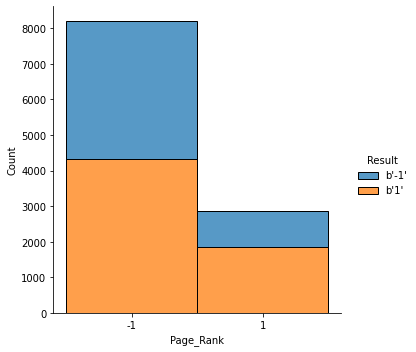

In [6]:
#histogram for visulization 
sns.displot(data=df, x="Page_Rank", hue="Result",multiple="stack")

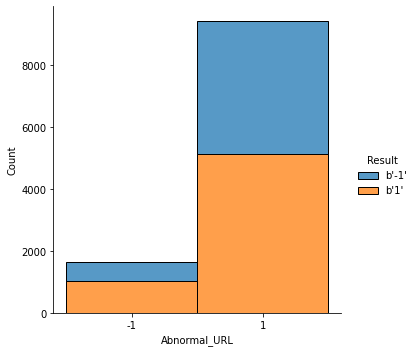

In [7]:
sns.displot(data=df, x="Abnormal_URL", hue="Result",multiple="stack")
#showing that majority of the phising attack url is "Abnormal"

### Comapring Page Rank and Web_traffic with Results

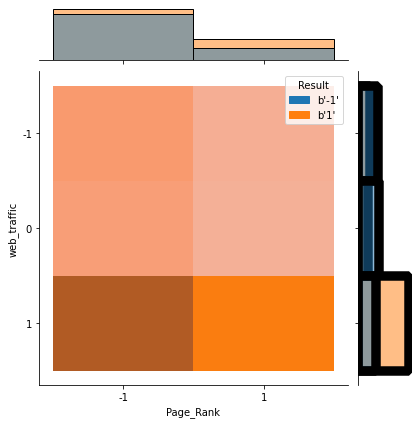

In [8]:
sns.jointplot(data=df, x="Page_Rank",y="web_traffic",hue="Result",kind="hist")

## Slicing the DataFrame

In [9]:
x = df.iloc[:,:-1].values.astype('int')   
y = df.iloc[:,-1:].values.astype('int')

### Train, Test Splitting 

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=79,)

## Training the Model 1
### Model 1 is build using existing Features (30) 



In [11]:
model = dtc()
model.fit(x_train,y_train)

DecisionTreeClassifier()

## Testing the Model
### Perfomance shows the Accuracy of 96%

In [12]:
pred = model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       982
           1       0.97      0.97      0.97      1229

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



## Label Encoding 
### Chi2 requires non-negative values to perform feature selection. So, Ordinal encoder and Label Encoders are used for converstion.

In [55]:
#encoding the data
xx = df.iloc[:,:-1].values.astype('int')
yy = df.iloc[:,-1:].values.astype('int')
oe = OrdinalEncoder()
le = LabelEncoder()
xx = oe.fit_transform(xx)   # Ordinal data
yy = le.fit_transform(yy)   # Label
xx_train,xx_test,yy_train,yy_test = train_test_split(xx,yy,test_size=0.2, random_state=9)

C:\Users\HM-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [78]:
# feature selection function
def feature_selection(scoreFunc,xx_train,xx_test,yy_train):
    print(len(xx_train),len(xx_test),len(yy_train))
    skb = SelectKBest(score_func=scoreFunc, k="all")
    skb.fit(xx_train,yy_train)
    xtrainfs = skb.transform(xx_train)
    xtestfs = skb.transform(xx_test)
    score_map = dict()
    for i in range(len(skb.scores_)):
        score_map[i] = skb.scores_[i]
    return score_map

# calling feature selection
chi_score_map = feature_selection(chi2, xx_train, xx_test, yy_train)
mic_score_map = feature_selection(mutual_info_classif,x_train, x_test, y_train)
chi_score = []
mic_score = []

#Storing score
for i in range(len(chi_score_map)):
    chi_score.append(chi_score_map[i])
    mic_score.append(mic_score_map[i])

# Attribute List for Both Selections
chi_l = []
mic_l = []
#Min-Max Normalization Attributes 
ma = max(chi_score)
mi = min(chi_score)
den = ma-mi
#Selecting Features based on scores 
for i in range(len(chi_score)):
    k = (((chi_score[i])-mi)/den)*100  #Normalization of chi2
    if(0.03 <= k):
        chi_l.append(i)
    if(0.3 <= mic_score[i]*100):
        mic_l.append(i)

8844 2211 8844
8844 2211 8844


C:\Users\HM-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [79]:
def feature_names(method):
    for i in (method):
        print(df.columns[int(i)], end=" ;  ")

In [80]:
xxx = df.iloc[:,[chi_l[i] for i in range(len(chi_l))]].values.astype('int')
yyy = df.iloc[:,-1:].values.astype('int')
print(len(xxx[0]))
model2 = dtc(max_depth=21)
xxx_train,xxx_test,yyy_train,yyy_test = train_test_split(xxx,yyy,test_size=.20) 
model2.fit(xxx_train,yyy_train)
pred = model2.predict(xxx_test)
print(classification_report(yyy_test,pred))
model2.get_depth()  #depth of the tree

25
              precision    recall  f1-score   support

          -1       0.95      0.97      0.96       969
           1       0.97      0.96      0.97      1242

    accuracy                           0.97      2211
   macro avg       0.96      0.97      0.96      2211
weighted avg       0.97      0.97      0.97      2211



21

## From Chi2 feature selection top 25 features are selected and results from Model 2 is significantly working parallel with the Model 1. 


### Chi2 Selected features are:

<AxesSubplot:>

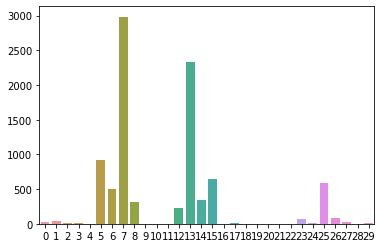

In [81]:
sns.barplot(x=[i for i in range(len(chi_score))], y=chi_score)

In [82]:
feature_names(chi_l)

having_IP_Address ;  URL_Length ;  Shortining_Service ;  having_At_Symbol ;  double_slash_redirecting ;  Prefix_Suffix ;  having_Sub_Domain ;  SSLfinal_State ;  Domain_registeration_length ;  port ;  HTTPS_token ;  Request_URL ;  URL_of_Anchor ;  Links_in_tags ;  SFH ;  Abnormal_URL ;  Redirect ;  on_mouseover ;  age_of_domain ;  DNSRecord ;  web_traffic ;  Page_Rank ;  Google_Index ;  Links_pointing_to_page ;  Statistical_report ;  

# Model 3
## Feature selected using Mutal_info_Classif

In [83]:
xxx = df.iloc[:,[mic_l[i] for i in range(len(mic_l))]].values.astype('int')
yyy = df.iloc[:,-1:].values.astype('int')
print(len(xxx[0]))
model3 = dtc()
xxx_train,xxx_test,yyy_train,yyy_test = train_test_split(xxx,yyy,test_size=.20) 
model3.fit(xxx_train,yyy_train)
pred = model3.predict(xxx_test)
print(classification_report(yyy_test,pred))
print("Maximum depth of DTC(Model 3) ==> ",model3.get_depth())


18
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       996
           1       0.96      0.97      0.96      1215

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

Maximum depth of DTC(Model 3) ==>  21


## Top 18 features are selected From Mutual_info_classif feature selection method and results from Model 3 is significantly working parallel with the Model 1 with lesser number of feature. 
### Feature selected are:

<AxesSubplot:>

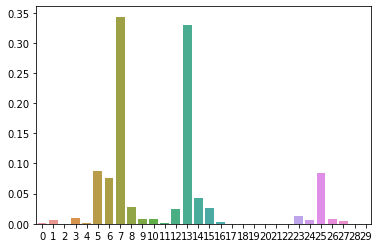

In [84]:
sns.barplot(x=[i for i in range(len(mic_score))], y=mic_score)

In [85]:
feature_names(mic_l,)

URL_Length ;  having_At_Symbol ;  Prefix_Suffix ;  having_Sub_Domain ;  SSLfinal_State ;  Domain_registeration_length ;  Favicon ;  port ;  Request_URL ;  URL_of_Anchor ;  Links_in_tags ;  SFH ;  Submitting_to_email ;  age_of_domain ;  DNSRecord ;  web_traffic ;  Page_Rank ;  Google_Index ;  




# Conclusion

### Model3 built using 18 from Mutual_info_classif Workes parallel with Model1 With 30 Features. And Model 2 Build using 25 Feature from Chi2 test Works slightly higher than Model1.